In [1]:
# - show figures inside the notebook
%matplotlib inline

In [2]:
# - import common modules
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package

In [3]:
# import events2neural from stimuli module
from stimuli import events2neural

In [4]:
import nibabel as nib

In [5]:
# Load the ds114_sub009_t2r1.nii image
img = nib.load('ds114_sub009_t2r1.nii')

In [6]:
# Get the number of volumes in ds114_sub009_t2r1.nii
n_trs = img.shape[-1]

The TR (time between scans) is 2.5 seconds.

In [7]:
TR = 2.5

Call the `events2neural` function to give you a time course that is 1 for the volumes during the task (thinking of verbs) and 0 for the volumes during rest.

In [8]:
# Call the events2neural function to generate the on-off values for each volume
time_course = events2neural('ds114_sub009_t2r1_cond.txt', 2.5, n_trs)

In [9]:
# Using slicing, drop the first 4 volumes, and the first 4 on-off values
data = img.get_data()
data = data[..., 4:]
time_course = time_course[4:]

In [10]:
# Calculate the number of voxels (number of elements in one volume)
n_voxels = np.prod(data.shape[:-1])

Now, reshape the 4D data to a 2D array shape (number of voxels, number of volumes).

In [11]:
# Reshape 4D array to 2D array n_voxels by n_volumes
data_2d = np.reshape(data, (n_voxels, data.shape[-1]))

In [12]:
# Make a 1D array of size (n_voxels,) to hold the correlation values
correlations_1d = np.zeros((n_voxels,))

Now loop over all voxels, calculate the correlation coefficient with `time_course` at this voxel, and fill in the corresponding entry in your 1D array.

In [13]:
# Loop over voxels filling in correlation at this voxel
for i in range(n_voxels):
    correlations_1d[i] = np.corrcoef(time_course, data_2d[i, :])[0, 1]

/Users/mb312/Library/Python/2.7/lib/python/site-packages/numpy/lib/function_base.py:1957: RuntimeWarning: invalid value encountered in true_divide
  return c / sqrt(multiply.outer(d, d))


Reshape the correlations 1D array back to a 3D array, using the original 3D shape.

In [14]:
# Reshape the correlations array back to 3D
correlations = np.reshape(correlations_1d, data.shape[:-1])

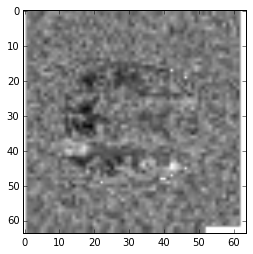

In [15]:
# Plot the middle slice of the third axis from the correlations array
plt.imshow(correlations[:, :, 14], cmap='gray')